# *Exploring the supervised Machine Learning with Decision Tree*

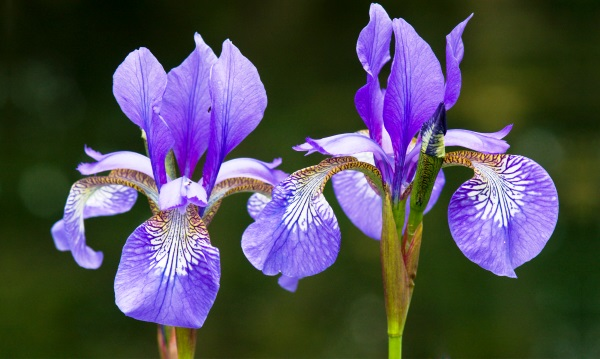

In [1]:
from IPython.display import Image
Image(filename='i.jpg', height=450, width=400)

## Importing the Libraries that are Required

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

#### Filtering the warnings to make the notebook look good

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
iris = datasets.load_iris()

In [5]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

#### Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”).

In [6]:
data['Species']=iris['target']

In [7]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [8]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


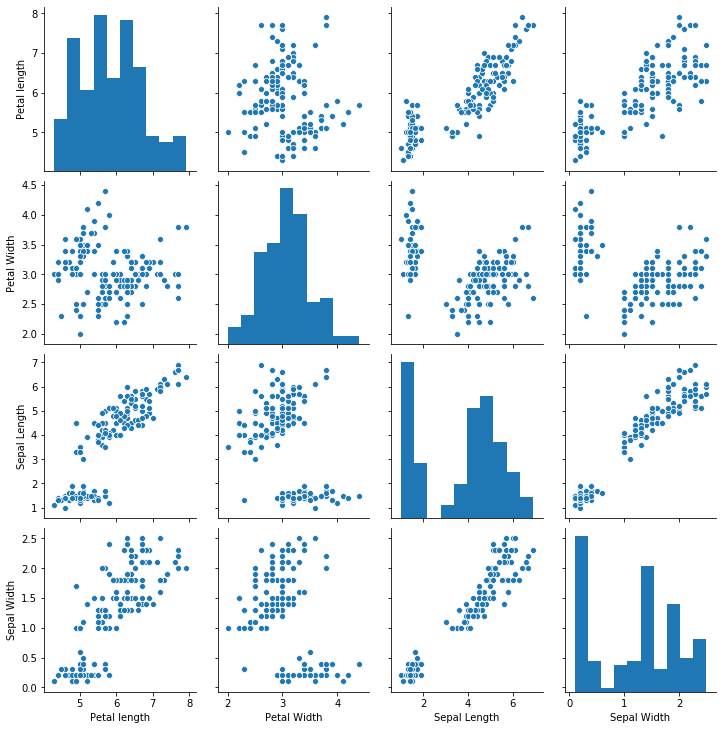

In [9]:
sns.pairplot(data)
plt.show()

## Let's check correlation using heatmap

[]

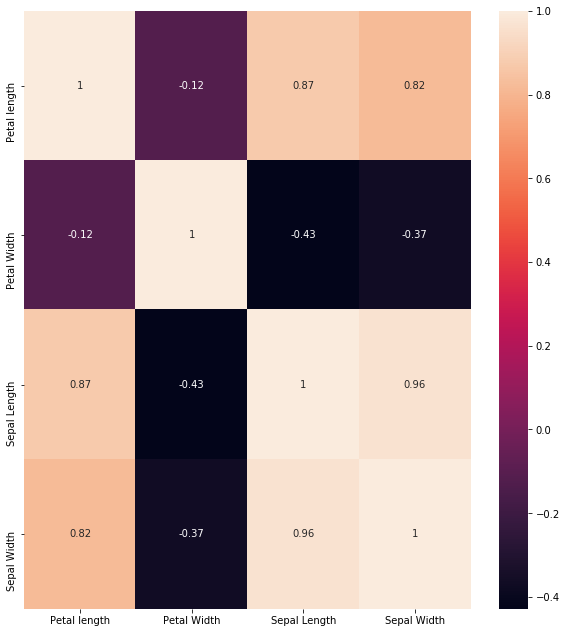

In [10]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

## Let's see that how the categorical feature “Species” is distributed with all other four input variables.

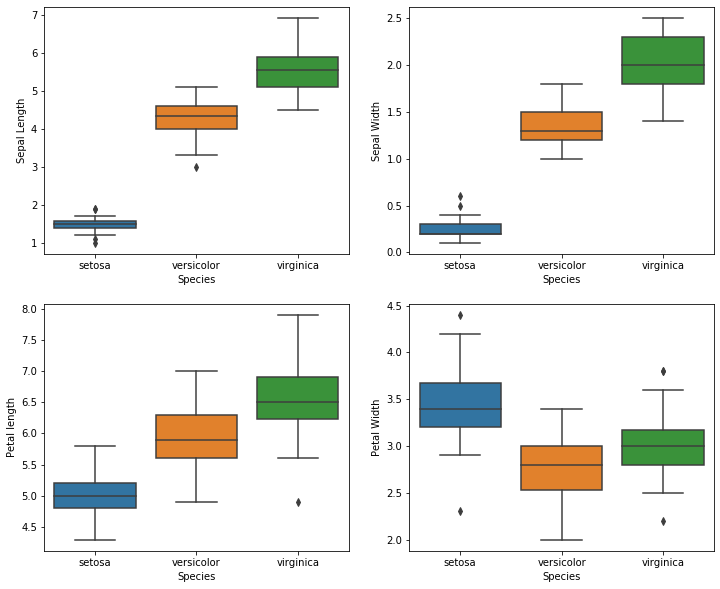

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

## Preparing the data for Model Building

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train,test=train_test_split(data,test_size=0.3)

In [14]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [15]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

## Importing Decision Tree from Sklearn to build a classification model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
DT = DecisionTreeClassifier(random_state=12)
model = DT.fit(train_X, train_y)

In [18]:
DT.predict(test_X)

array(['virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica'], dtype=object)

#### Let's check accuracy of the model build

In [19]:
DT.score(test_X, test_y)

0.9777777777777777

In [20]:
#prediction
y_pred = DT.predict(test_X)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred))

Accuracy Score: 0.9777777777777777


## As the model is now ready, moving ahead for the visualization of the Decision Tree 

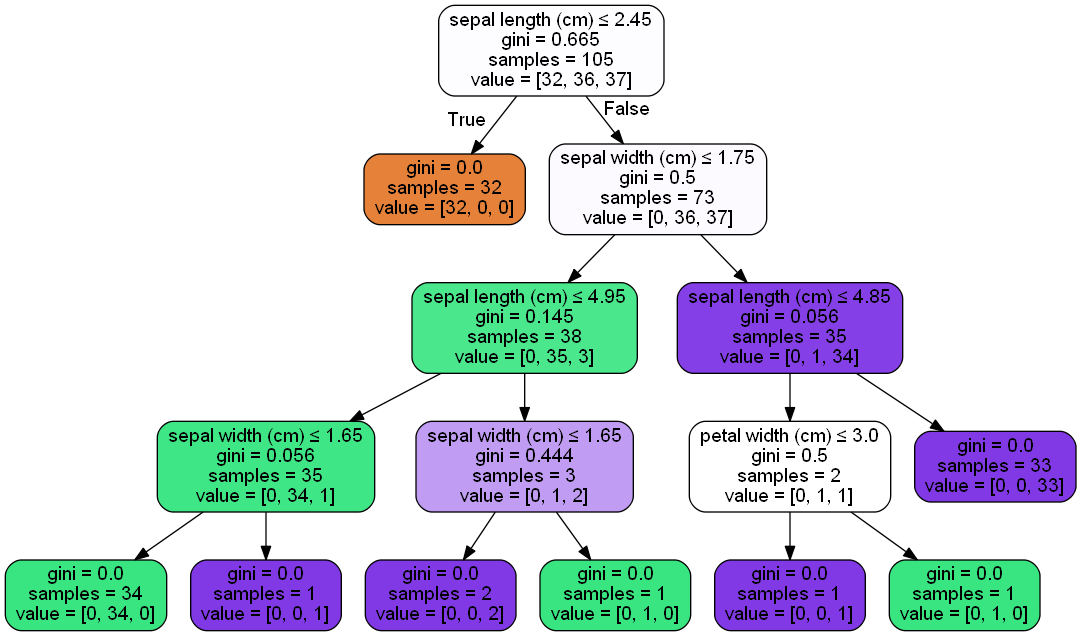

In [21]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Exploring the Text Representation

Exporting Decision Tree to the text representation can be very benificial when we want to log information about the model into the text file.

In [22]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 2.45
|   |--- class: setosa
|--- feature_0 >  2.45
|   |--- feature_1 <= 1.75
|   |   |--- feature_0 <= 4.95
|   |   |   |--- feature_1 <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_1 >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- feature_0 >  4.95
|   |   |   |--- feature_1 <= 1.65
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  1.65
|   |   |   |   |--- class: versicolor
|   |--- feature_1 >  1.75
|   |   |--- feature_0 <= 4.85
|   |   |   |--- feature_3 <= 3.00
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  3.00
|   |   |   |   |--- class: versicolor
|   |   |--- feature_0 >  4.85
|   |   |   |--- class: virginica



##  Finally...coming to our main purpose that if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [23]:
DT.predict([[3.5, 1.9, 5.2, 2.4]])

array(['virginica'], dtype=object)

In [24]:
DT.predict([[4.6, 2.9, 3.6, 5.9]])

array(['versicolor'], dtype=object)